In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import re
import os
import sys
import navani.echem as ec

In [22]:
plt_params = {# 'axes.labelsize': 'x-large',
#               'axes.titlesize': 'x-large',
#               'xtick.labelsize': 'x-large',
#               'ytick.labelsize': 'x-large',
              'font.family': 'serif',
              'axes.labelsize': 20,
              'axes.labelweight': 'bold',  # Make axes labels bold
              'xtick.labelsize': 18,
              'ytick.labelsize': 18,
              'xtick.major.size': 7,
              'ytick.major.size': 7,
              'xtick.major.width': 2.0,
              'ytick.major.width': 2.0,
              'xtick.direction': 'in',
              'ytick.direction': 'in',
              'font.size': 24,
              'axes.linewidth': 2.0,
              'lines.dashed_pattern': (5, 2.5),
              'lines.markersize': 10,
              'lines.linewidth': 3,
              'lines.markeredgewidth': 1,
              'lines.markeredgecolor': 'k',
              'legend.fontsize': 16,  # Adjust the font size of the legend
              'legend.title_fontsize': 24,  # Increase legend title size if needed
              'legend.frameon': True
    }
plt.rcParams.update(plt_params)

In [52]:
df = {} # Initialize empty dataframe
data_dir = os.path.join('..', 'PROPEL-1K')

def import_data(cellid):
    '''
    Import the data from a processed .csv file for the chosen cell ID and add it to df.
    '''

    data_filename = glob.glob(os.path.join(data_dir, '*', '*' + cellid + '*', 'outputs', ('[0-9]'*6) + '*.csv'))

    if len(data_filename) > 1:
        print("Multiple matching files found. Importing from the first such file.")
    data_filename = data_filename[0]
    print(f"Importing from {data_filename}.")

    df[cellid] = ec.echem_file_loader(data_filename)

In [53]:
cellids_to_import = ['CC040A', 'CC043A', 'CC044A', 'CC041D']

for cellid in cellids_to_import:
    import_data(cellid)

Importing from ../PROPEL-1K/Li-CuF2-25CB-C1-GFA/240703-CC040A-2cyc_C100_1V_4p5V_GITT_6h_10SoC-RT/outputs/240703-CC040A-2cyc_C100_1V_4p5V_GITT_6h_10SoC-RT.csv.


/home/eschlerc/git/navani/navani/echem.py:149: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath,


Importing from ../PROPEL-1K/Li-CuF2-25CB-G2-Celgard2500/240923-CC043A-5cyc_C100_1V_4p4V_GITT_6h_10SoC-RT/outputs/240923-CC043A-5cyc_C100_1V_4p4V_GITT_6h_10SoC-RT.csv.


/home/eschlerc/git/navani/navani/echem.py:149: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath,


Importing from ../PROPEL-1K/Li-CuF2-25CB-G3-Celgard2500/240923-CC044A-5cyc_C100_1V_4p4V_GITT_6h_10SoC-RT/outputs/240923-CC044A-5cyc_C100_1V_4p4V_GITT_6h_10SoC-RT.csv.


/home/eschlerc/git/navani/navani/echem.py:149: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath,


Importing from ../PROPEL-1K/Li-Cu0p9Fe0p1F2-25CB-C1-GFA/240719-CC041D-3cyc_C100_1V_4p5V_GITT_6h_10SoC-RT/outputs/240719-CC041D-3cyc_C100_1V_4p5V_GITT_6h_10SoC-RT.csv.


/home/eschlerc/git/navani/navani/echem.py:149: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath,


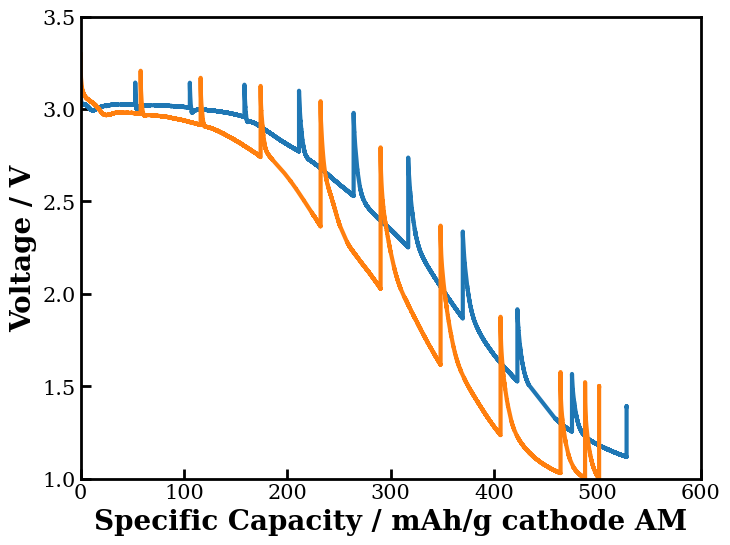

In [43]:
plt.subplots(figsize=(8,6))
for cellid in ['CC040A', 'CC041D']:
    plt.plot(df[cellid]['Specific Capacity'][df[cellid]['full cycle'] == 0], df[cellid]['Voltage'][df[cellid]['full cycle'] == 0], '-')
plt.ylim(1,3.5)
plt.xlim(0,600)
plt.xlabel('Specific Capacity / mAh/g cathode AM')
plt.ylabel('Voltage / V')
# plt.legend()
plt.show()

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Specific Capacity / mAh/g', ylabel='Voltage / V'>)

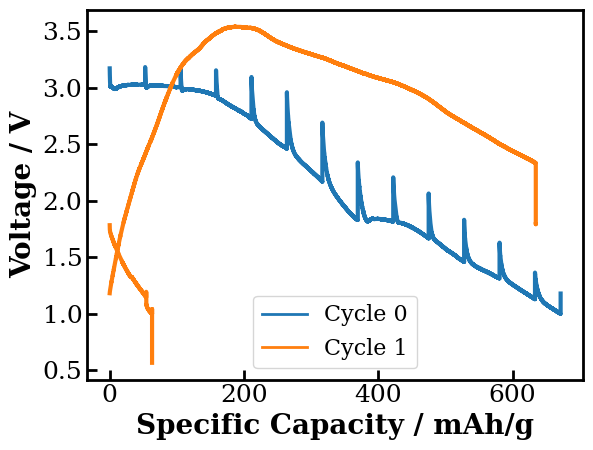

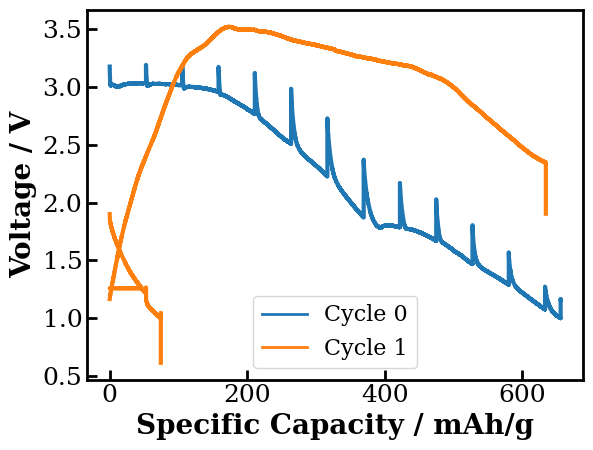

In [59]:
# ec.charge_discharge_plot(df['CC040A'], cycles=[0,1,2], norm='mass')
ec.charge_discharge_plot(df['CC043A'], cycles=[0,1], norm='mass')
ec.charge_discharge_plot(df['CC044A'], cycles=[0,1], norm='mass')

In [38]:
dir = '/home/eschlerc/Dropbox (MIT)/MIT/_Grad/Thesis/Data/PROPEL-1K/Li-CuF2-25CB-C1-GFA/240703-CC040A-2cyc_C100_1V_4p5V_GITT_6h_10SoC-RT'
data_filename = glob.glob(dir+'/outputs/'+('[0-9]'*6)+'*.csv')[0] # Finds the first .csv file in outputs whose filename begins with 6 numerals (i.e. date)
df = ec.echem_file_loader(data_filename)
print(df)

/home/eschlerc/git/navani/navani/echem.py:149: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath,


         flags  Ns        time/s  dQ/mA.h   (Q-Qo)/mA.h  control/V/mA  \
0           23   0  2.278052e+04      0.0 -3.619216e-09      3.130296   
1           23   0  2.278152e+04      0.0 -3.619216e-09      0.000000   
2           23   0  2.278252e+04      0.0 -3.619216e-09      0.000000   
3           23   0  2.278352e+04      0.0 -3.619216e-09      0.000000   
4           23   0  2.278452e+04      0.0 -3.619216e-09      0.000000   
...        ...  ..           ...      ...           ...           ...   
1495475    151   4  2.702352e+06      0.0 -8.583436e-02      0.000000   
1495476    151   4  2.702362e+06      0.0 -8.583436e-02      0.000000   
1495477    151   4  2.702372e+06      0.0 -8.583436e-02      0.000000   
1495478    151   4  2.702382e+06      0.0 -8.583436e-02      0.000000   
1495479    215   4  2.702382e+06      0.0 -8.583436e-02      0.000000   

          Voltage  I Range  Q charge/discharge/mA.h  half cycle  ...  \
0        3.133033       12                 0.000000

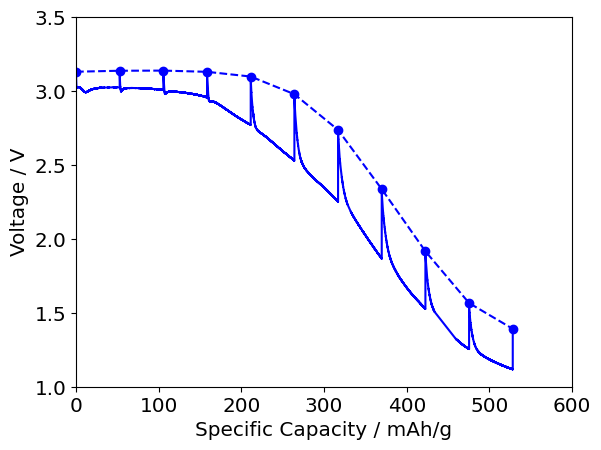

In [41]:
ec.charge_discharge_plot(df, cycles=0, norm='mass')
plt.plot(df_OCV_C1['Specific Capacity'][df_OCV_C1['full cycle'] == 0], df_OCV_C1['Voltage'][df_OCV_C1['full cycle'] == 0], 'o--', color='blue', label='1M LiPF$_6$ in 50:50 EC/DMC')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["blue"]) 
plt.ylim(1,3.5)
plt.xlim(0,600)
plt.savefig('plots/CC040A_GITT_voltage_cap.png')

In [48]:
dir = '/home/eschlerc/Dropbox (MIT)/MIT/_Grad/Thesis/Data/PROPEL-1K/Li-CuF2-25CB-C1-GFA/240703-CC040A-2cyc_C100_1V_4p5V_GITT_6h_10SoC-RT'
data_filename = glob.glob(dir+'/outputs/'+('[0-9]'*6)+'*.csv')[0]
df = ec.echem_file_loader(data_filename)
df_rest = df.loc[df['state'] == 'R']
df_OCV_C1 = df_rest.groupby('Specific Capacity').tail(1)
ocv = list(df_OCV_C1['Voltage'])
disch_voltage = list(df.iloc[df_rest.groupby('Specific Capacity').head(1).index-1]['Voltage'])
caps_C1 = list(df_OCV_C1['Specific Capacity'])
overpotential_C1 = [a_i - b_i for a_i, b_i in zip(ocv, disch_voltage)]

dir = '/home/eschlerc/Dropbox (MIT)/MIT/_Grad/Thesis/Data/PROPEL-1K/Li-CuF2-25CB-G2-Celgard2500/240923-CC043A-5cyc_C100_1V_4p4V_GITT_6h_10SoC-RT'
data_filename = glob.glob(dir+'/outputs/'+('[0-9]'*6)+'*.csv')[0]
df = ec.echem_file_loader(data_filename)
df_rest = df.loc[df['state'] == 'R']
df_OCV_G2 = df_rest.groupby('Specific Capacity').tail(1)
ocv = list(df_OCV_G2['Voltage'])
disch_voltage = list(df.iloc[df_rest.groupby('Specific Capacity').head(1).index-1]['Voltage'])
caps_G2 = list(df_OCV_G2['Specific Capacity'])
overpotential_G2 = [a_i - b_i for a_i, b_i in zip(ocv, disch_voltage)]

dir = '/home/eschlerc/Dropbox (MIT)/MIT/_Grad/Thesis/Data/PROPEL-1K/Li-CuF2-25CB-G3-Celgard2500/240923-CC044A-5cyc_C100_1V_4p4V_GITT_6h_10SoC-RT'
data_filename = glob.glob(dir+'/outputs/'+('[0-9]'*6)+'*.csv')[0]
df = ec.echem_file_loader(data_filename)
df_rest = df.loc[df['state'] == 'R']
df_OCV_G3 = df_rest.groupby('Specific Capacity').tail(1)
ocv = list(df_OCV_G3['Voltage'])
disch_voltage = list(df.iloc[df_rest.groupby('Specific Capacity').head(1).index-1]['Voltage'])
caps_G3 = list(df_OCV_G3['Specific Capacity'])
overpotential_G3 = [a_i - b_i for a_i, b_i in zip(ocv, disch_voltage)]

/home/eschlerc/git/navani/navani/echem.py:149: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath,
/home/eschlerc/git/navani/navani/echem.py:149: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath,
/home/eschlerc/git/navani/navani/echem.py:149: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath,


In [29]:
dir = '/home/eschlerc/Dropbox (MIT)/MIT/_Grad/Thesis/Data/PROPEL-1K/Li-CuF2-25CB-C1-GFA/240703-CC040A-2cyc_C100_1V_4p5V_GITT_6h_10SoC-RT'
data_filename = glob.glob(dir+'/outputs/'+('[0-9]'*6)+'*.csv')[0]
df = ec.echem_file_loader(data_filename)
df_rest = df.loc[df['state'] == 'R']
df_OCV_Cu_C1 = df_rest.groupby('Specific Capacity').tail(1)
ocv = list(df_OCV_Cu_C1['Voltage'])
disch_voltage = list(df.iloc[df_rest.groupby('Specific Capacity').head(1).index-1]['Voltage'])
caps_Cu_C1 = list(df_OCV_Cu_C1['Specific Capacity'])
overpotential_Cu_C1 = [a_i - b_i for a_i, b_i in zip(ocv, disch_voltage)]

dir = '/home/eschlerc/Dropbox (MIT)/MIT/_Grad/Thesis/Data/PROPEL-1K/Li-FeF3-25CB-C1-GFA/240628-CC037D-2cyc_C100_1V_4p5V_GITT_6h_10SoC-RT'
data_filename = glob.glob(dir+'/outputs/'+('[0-9]'*6)+'*.csv')[0]
df = ec.echem_file_loader(data_filename)
df_rest = df.loc[df['state'] == 'R']
df_OCV_Fe_C1 = df_rest.groupby('Specific Capacity').tail(1)
ocv = list(df_OCV_Fe_C1['Voltage'])
disch_voltage = list(df.iloc[df_rest.groupby('Specific Capacity').head(1).index-1]['Voltage'])
caps_Fe_C1 = list(df_OCV_Fe_C1['Specific Capacity'])
overpotential_Fe_C1 = [a_i - b_i for a_i, b_i in zip(ocv, disch_voltage)]

/home/eschlerc/git/navani/navani/echem.py:149: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath,
/home/eschlerc/git/navani/navani/echem.py:149: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath,


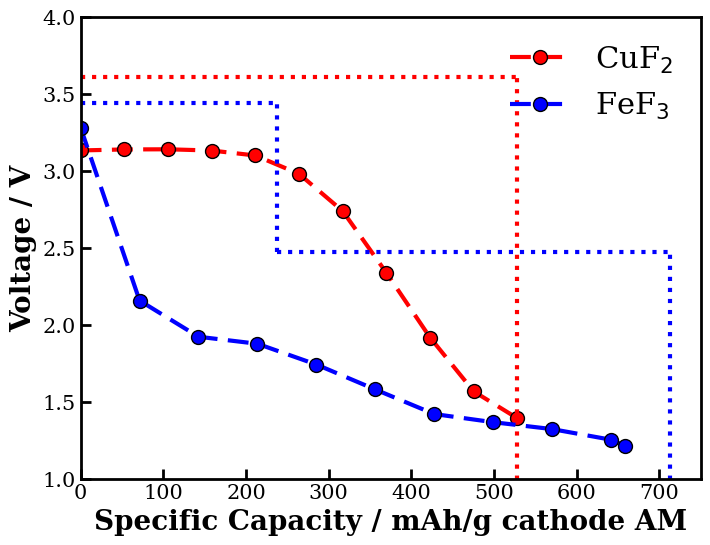

In [33]:
plt.subplots(figsize=(8,6))
plt.plot(df_OCV_Cu_C1['Specific Capacity'][df_OCV_Cu_C1['full cycle'] == 0], df_OCV_Cu_C1['Voltage'][df_OCV_Cu_C1['full cycle'] == 0], 'o--', color='red', label='CuF$_2$')
plt.hlines(3.61, 0, 527.9, color='red', linestyles='dotted')
plt.vlines(527.9, 0, 3.61, color='red', linestyles='dotted')
plt.plot(df_OCV_Fe_C1['Specific Capacity'][df_OCV_Fe_C1['full cycle'] == 0], df_OCV_Fe_C1['Voltage'][df_OCV_Fe_C1['full cycle'] == 0], 'o--', color='blue', label='FeF$_3$')
plt.hlines(3.44, 0, 237.5, color='blue', linestyles='dotted')
plt.vlines(237.5, 2.47, 3.44, color='blue', linestyles='dotted')
plt.hlines(2.47, 237.5, 712.5, color='blue', linestyles='dotted')
plt.vlines(712.5, 0, 2.47, color='blue', linestyles='dotted')
plt.ylim(1,4)
plt.xlim(0,750)
plt.xlabel('Specific Capacity / mAh/g cathode AM')
plt.ylabel('Voltage / V')
plt.legend()
plt.show()
# plt.savefig('plots/GITT_OCV_CuF2.png')

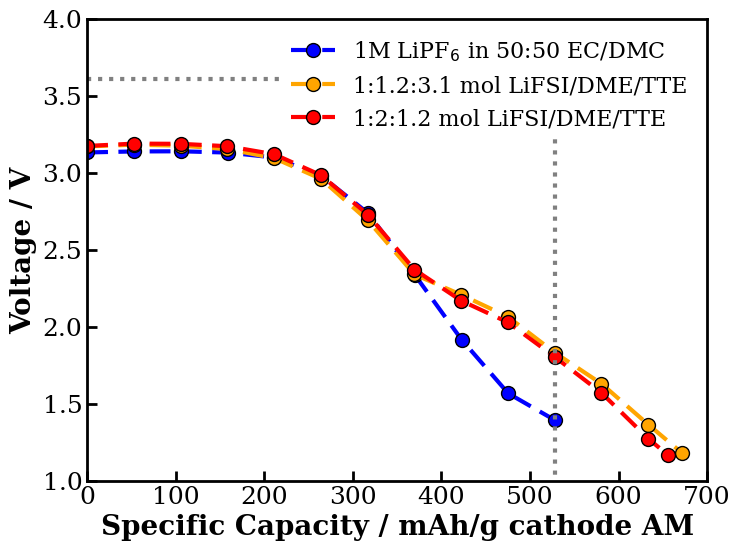

In [49]:

plt.subplots(figsize=(8,6))
plt.plot(df_OCV_C1['Specific Capacity'][df_OCV_C1['full cycle'] == 0], df_OCV_C1['Voltage'][df_OCV_C1['full cycle'] == 0], 'o--', color='blue', label='1M LiPF$_6$ in 50:50 EC/DMC')
plt.plot(df_OCV_G2['Specific Capacity'][df_OCV_G2['full cycle'] == 0], df_OCV_G2['Voltage'][df_OCV_G2['full cycle'] == 0], 'o--', color='orange', label='1:1.2:3.1 mol LiFSI/DME/TTE')
plt.plot(df_OCV_G3['Specific Capacity'][df_OCV_G3['full cycle'] == 0], df_OCV_G3['Voltage'][df_OCV_G3['full cycle'] == 0], 'o--', color='red', label='1:2:1.2 mol LiFSI/DME/TTE')
plt.hlines(3.61, 0, 527.9, color='gray', linestyles='dotted')
plt.vlines(527.9, 0, 3.61, color='gray', linestyles='dotted')
plt.ylim(1,4)
plt.xlim(0,700)
plt.xlabel('Specific Capacity / mAh/g cathode AM')
plt.ylabel('Voltage / V')
leg = plt.legend(facecolor='white', framealpha=1)
leg.get_frame().set_linewidth(0.0)
# plt.savefig('plots/GITT_OCV_CuF2.png')

In [50]:
print(np.trapz(list(df_OCV_C1['Voltage'][df_OCV_C1['full cycle'] == 0]), list(df_OCV_C1['Specific Capacity'][df_OCV_C1['full cycle'] == 0])))
print(np.trapz(list(df_OCV_G2['Voltage'][df_OCV_G2['full cycle'] == 0]), list(df_OCV_G2['Specific Capacity'][df_OCV_G2['full cycle'] == 0])))
print(np.trapz(list(df_OCV_G3['Voltage'][df_OCV_G3['full cycle'] == 0]), list(df_OCV_G3['Specific Capacity'][df_OCV_G3['full cycle'] == 0])))

1389.365749281109
1663.258337023814
1639.5588765818202


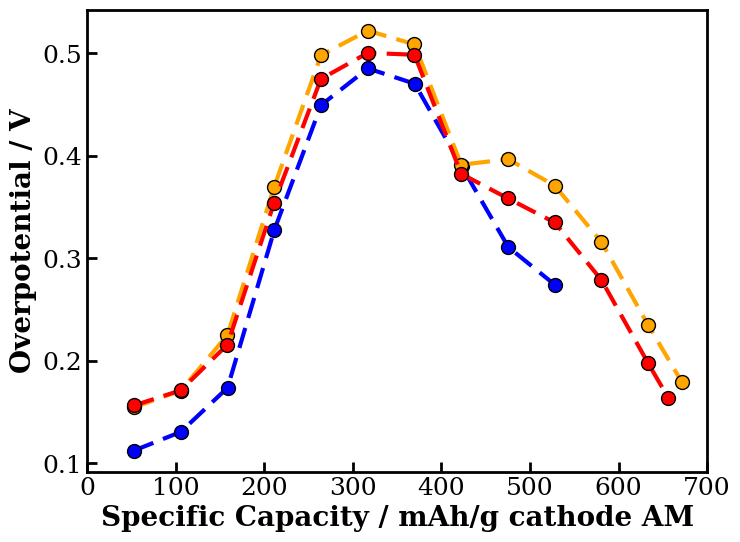

In [30]:
plt.subplots(figsize=(8,6))
plt.plot(caps_C1[1:11], overpotential_C1[1:11], 'o--', color='blue', label='1M LiPF$_6$ in 50:50 EC/DMC')
plt.plot(caps_G2[1:14], overpotential_G2[1:14], 'o--', color='orange', label='1:1.2:3.1 mol LiFSI/DME/TTE')
plt.plot(caps_G3[1:14], overpotential_G3[1:14], 'o--', color='red', label='1:2:1.2 mol LiFSI/DME/TTE')
# plt.ylim(1,3.5)
plt.xlim(0,700)
plt.xlabel('Specific Capacity / mAh/g cathode AM')
plt.ylabel('Overpotential / V')
# leg = plt.legend(facecolor='white', framealpha=1)
# leg.get_frame().set_linewidth(0.0)
plt.savefig('plots/GITT_overpotential_CuF2.png')

In [60]:
dir = '/home/eschlerc/Dropbox (MIT)/MIT/_Grad/Thesis/Data/PROPEL-1K/Li-FeF3-25CB-C1-GFA/240628-CC037D-2cyc_C100_1V_4p5V_GITT_6h_10SoC-RT'
data_filename = glob.glob(dir+'/outputs/'+('[0-9]'*6)+'*.csv')[0]
df = ec.echem_file_loader(data_filename)
df_rest = df.loc[df['state'] == 'R']
df_OCV_C1 = df_rest.groupby('Specific Capacity').tail(1)
ocv = list(df_OCV_C1['Voltage'])
disch_voltage = list(df.iloc[df_rest.groupby('Specific Capacity').head(1).index-1]['Voltage'])
caps_C1 = list(df_OCV_C1['Specific Capacity'])
overpotential_C1 = [a_i - b_i for a_i, b_i in zip(ocv, disch_voltage)]

dir = '/home/eschlerc/Dropbox (MIT)/MIT/_Grad/Thesis/Data/PROPEL-1K/Li-FeF3-25CB-G2-Celgard2500/241001-CC046B-GITT_C100_10SOC_6h_1V_4p4V_CCCV-10cyc'
data_filename = glob.glob(dir+'/outputs/'+('[0-9]'*6)+'*.csv')[0]
df = ec.echem_file_loader(data_filename)
df_rest = df.loc[df['state'] == 'R']
df_OCV_G2 = df_rest.groupby('Specific Capacity').tail(1)
ocv = list(df_OCV_G2['Voltage'])
disch_voltage = list(df.iloc[df_rest.groupby('Specific Capacity').head(1).index-1]['Voltage'])
caps_G2 = list(df_OCV_G2['Specific Capacity'])
overpotential_G2 = [a_i - b_i for a_i, b_i in zip(ocv, disch_voltage)]

dir = '/home/eschlerc/Dropbox (MIT)/MIT/_Grad/Thesis/Data/PROPEL-1K/Li-FeF3-25CB-G3-Celgard2500/241001-CC047B-GITT_C100_10SOC_6h_1V_4p4V_CCCV-10cyc'
data_filename = glob.glob(dir+'/outputs/'+('[0-9]'*6)+'*.csv')[0]
df = ec.echem_file_loader(data_filename)
df_rest = df.loc[df['state'] == 'R']
df_OCV_G3 = df_rest.groupby('Specific Capacity').tail(1)
ocv = list(df_OCV_G3['Voltage'])
disch_voltage = list(df.iloc[df_rest.groupby('Specific Capacity').head(1).index-1]['Voltage'])
caps_G3 = list(df_OCV_G3['Specific Capacity'])
overpotential_G3 = [a_i - b_i for a_i, b_i in zip(ocv, disch_voltage)]

/home/eschlerc/git/navani/navani/echem.py:149: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath,
/home/eschlerc/git/navani/navani/echem.py:149: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath,
/home/eschlerc/git/navani/navani/echem.py:149: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath,


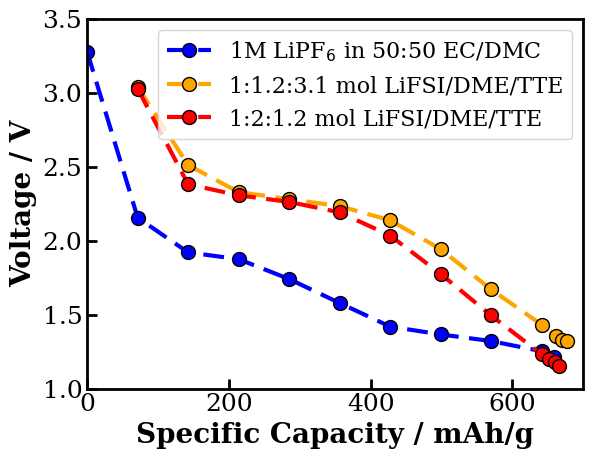

In [61]:
plt.plot(df_OCV_C1['Specific Capacity'][df_OCV_C1['full cycle'] == 0], df_OCV_C1['Voltage'][df_OCV_C1['full cycle'] == 0], 'o--', color='blue', label='1M LiPF$_6$ in 50:50 EC/DMC')
plt.plot(df_OCV_G2['Specific Capacity'][df_OCV_G2['half cycle'] == 3], df_OCV_G2['Voltage'][df_OCV_G2['half cycle'] == 3], 'o--', color='orange', label='1:1.2:3.1 mol LiFSI/DME/TTE')
plt.plot(df_OCV_G3['Specific Capacity'][df_OCV_G3['half cycle'] == 3], df_OCV_G3['Voltage'][df_OCV_G3['half cycle'] == 3], 'o--', color='red', label='1:2:1.2 mol LiFSI/DME/TTE')
plt.ylim(1,3.5)
plt.xlim(0,700)
plt.xlabel('Specific Capacity / mAh/g')
plt.ylabel('Voltage / V')
plt.legend()
plt.savefig('plots/GITT_OCV_FeF3.png')

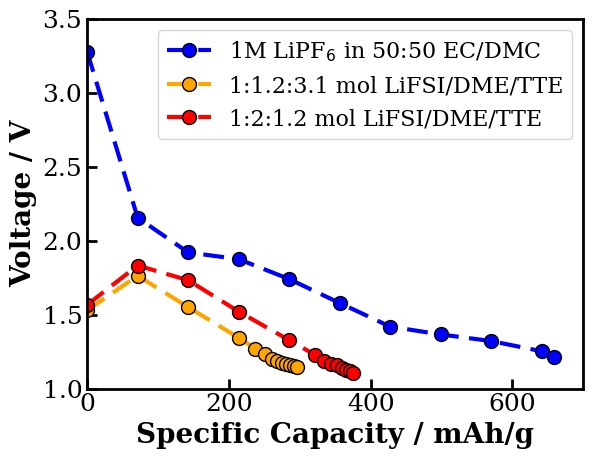

In [62]:
plt.plot(df_OCV_C1['Specific Capacity'][df_OCV_C1['full cycle'] == 0], df_OCV_C1['Voltage'][df_OCV_C1['full cycle'] == 0], 'o--', color='blue', label='1M LiPF$_6$ in 50:50 EC/DMC')
plt.plot(df_OCV_G2['Specific Capacity'][df_OCV_G2['full cycle'] == 0], df_OCV_G2['Voltage'][df_OCV_G2['full cycle'] == 0], 'o--', color='orange', label='1:1.2:3.1 mol LiFSI/DME/TTE')
plt.plot(df_OCV_G3['Specific Capacity'][df_OCV_G3['full cycle'] == 0], df_OCV_G3['Voltage'][df_OCV_G3['full cycle'] == 0], 'o--', color='red', label='1:2:1.2 mol LiFSI/DME/TTE')
plt.ylim(1,3.5)
plt.xlim(0,700)
plt.xlabel('Specific Capacity / mAh/g')
plt.ylabel('Voltage / V')
plt.legend()
plt.savefig('plots/GITT_OCV_FeF3.png')

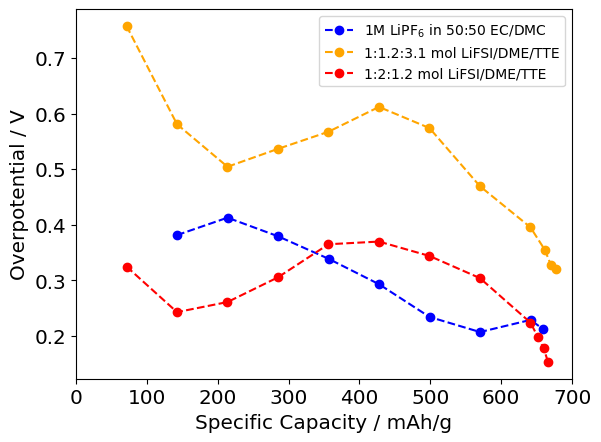

In [128]:
plt.plot(caps_C1[2:11], overpotential_C1[2:11], 'o--', color='blue', label='1M LiPF$_6$ in 50:50 EC/DMC')
plt.plot(caps_G2[14:26], overpotential_G2[14:26], 'o--', color='orange', label='1:1.2:3.1 mol LiFSI/DME/TTE')
plt.plot(caps_G3[14:26], overpotential_G3[14:26], 'o--', color='red', label='1:2:1.2 mol LiFSI/DME/TTE')
# plt.ylim(1,3.5)
plt.xlim(0,700)
plt.xlabel('Specific Capacity / mAh/g')
plt.ylabel('Overpotential / V')
plt.legend()
plt.savefig('plots/GITT_overpotential_FeF3.png')

In [63]:
print(np.trapz(list(df_OCV_C1['Voltage'][df_OCV_C1['full cycle'] == 0]), list(df_OCV_C1['Specific Capacity'][df_OCV_C1['full cycle'] == 0])))
print(np.trapz(list(df_OCV_G2['Voltage'][df_OCV_G2['full cycle'] == 0]), list(df_OCV_G2['Specific Capacity'][df_OCV_G2['full cycle'] == 0])))
print(np.trapz(list(df_OCV_G3['Voltage'][df_OCV_G3['full cycle'] == 0]), list(df_OCV_G3['Specific Capacity'][df_OCV_G3['full cycle'] == 0])))

1136.0277866079437
439.8010449463955
574.9611765952285


In [38]:
cellids_to_import = ['CC042D', 'CC043D', 'CC044D']
for cellid in cellids_to_import:
    import_data(cellid)

Importing from ../PROPEL-1K/Li-CuF2-25CB-C1-Celgard2500/241008-CC042D-CA_3p2V_4p5V_0p1Vstep_12h/outputs/241008-CC042D-CA_3p2V_4p5V_0p1Vstep_12h.csv.


/home/eschlerc/git/navani/navani/echem.py:149: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath,


Importing from ../PROPEL-1K/Li-CuF2-25CB-G2-Celgard2500/241008-CC043D-CA_3p2V_4p5V_0p1Vstep_12h/outputs/241008-CC043D-CA_3p2V_4p5V_0p1Vstep_12h.csv.


/home/eschlerc/git/navani/navani/echem.py:149: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath,


Importing from ../PROPEL-1K/Li-CuF2-25CB-G3-Celgard2500/241008-CC044D-CA_3p2V_4p5V_0p1Vstep_12h/outputs/241008-CC044D-CA_3p2V_4p5V_0p1Vstep_12h.csv.


/home/eschlerc/git/navani/navani/echem.py:149: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath,


Text(0, 0.5, 'Voltage / V')

/home/eschlerc/anaconda3/envs/navani/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/eschlerc/anaconda3/envs/navani/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


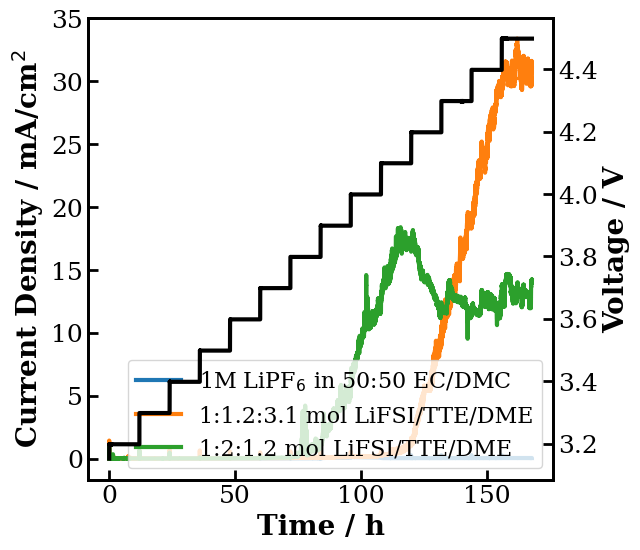

In [47]:
fig, ax1 = plt.subplots(figsize=(6,6))
ax1.plot(df['CC042D']['Time']/3600, df['CC042D']['Areal Current'], label="1M LiPF$_6$ in 50:50 EC/DMC")
ax1.plot(df['CC043D']['Time']/3600, df['CC043D']['Areal Current'], label="1:1.2:3.1 mol LiFSI/TTE/DME")
ax1.plot(df['CC044D']['Time']/3600, df['CC044D']['Areal Current'], label="1:2:1.2 mol LiFSI/TTE/DME")
ax1.set_xlabel('Time / h')
ax1.set_ylabel('Current Density / mA/cm$^2$')
# ax1.set_ylim(0,1)
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(df['CC042D']['Time']/3600, df['CC042D']['Voltage'], color='black')
ax2.set_ylabel('Voltage / V')
